In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from utils import *
from typing import Any, List, Dict,Tuple

### ````Get Stat DATA ````

In [5]:
try:
    agents = [0,1, 3, 5,7]
    df = [
        {
            f"SmallAgent AI-{k}": pd.read_csv(f"results/accuracy_results{inv}_{k}.csv", index_col="N")
            for k in agents
        }
        for inv in range(6)
        ]
except Exception as e:
    print(f"Error :'results' doesn't exist {e}")

Error :'results' doesn't exist [Errno 2] No such file or directory: 'results/accuracy_results0_0.csv'


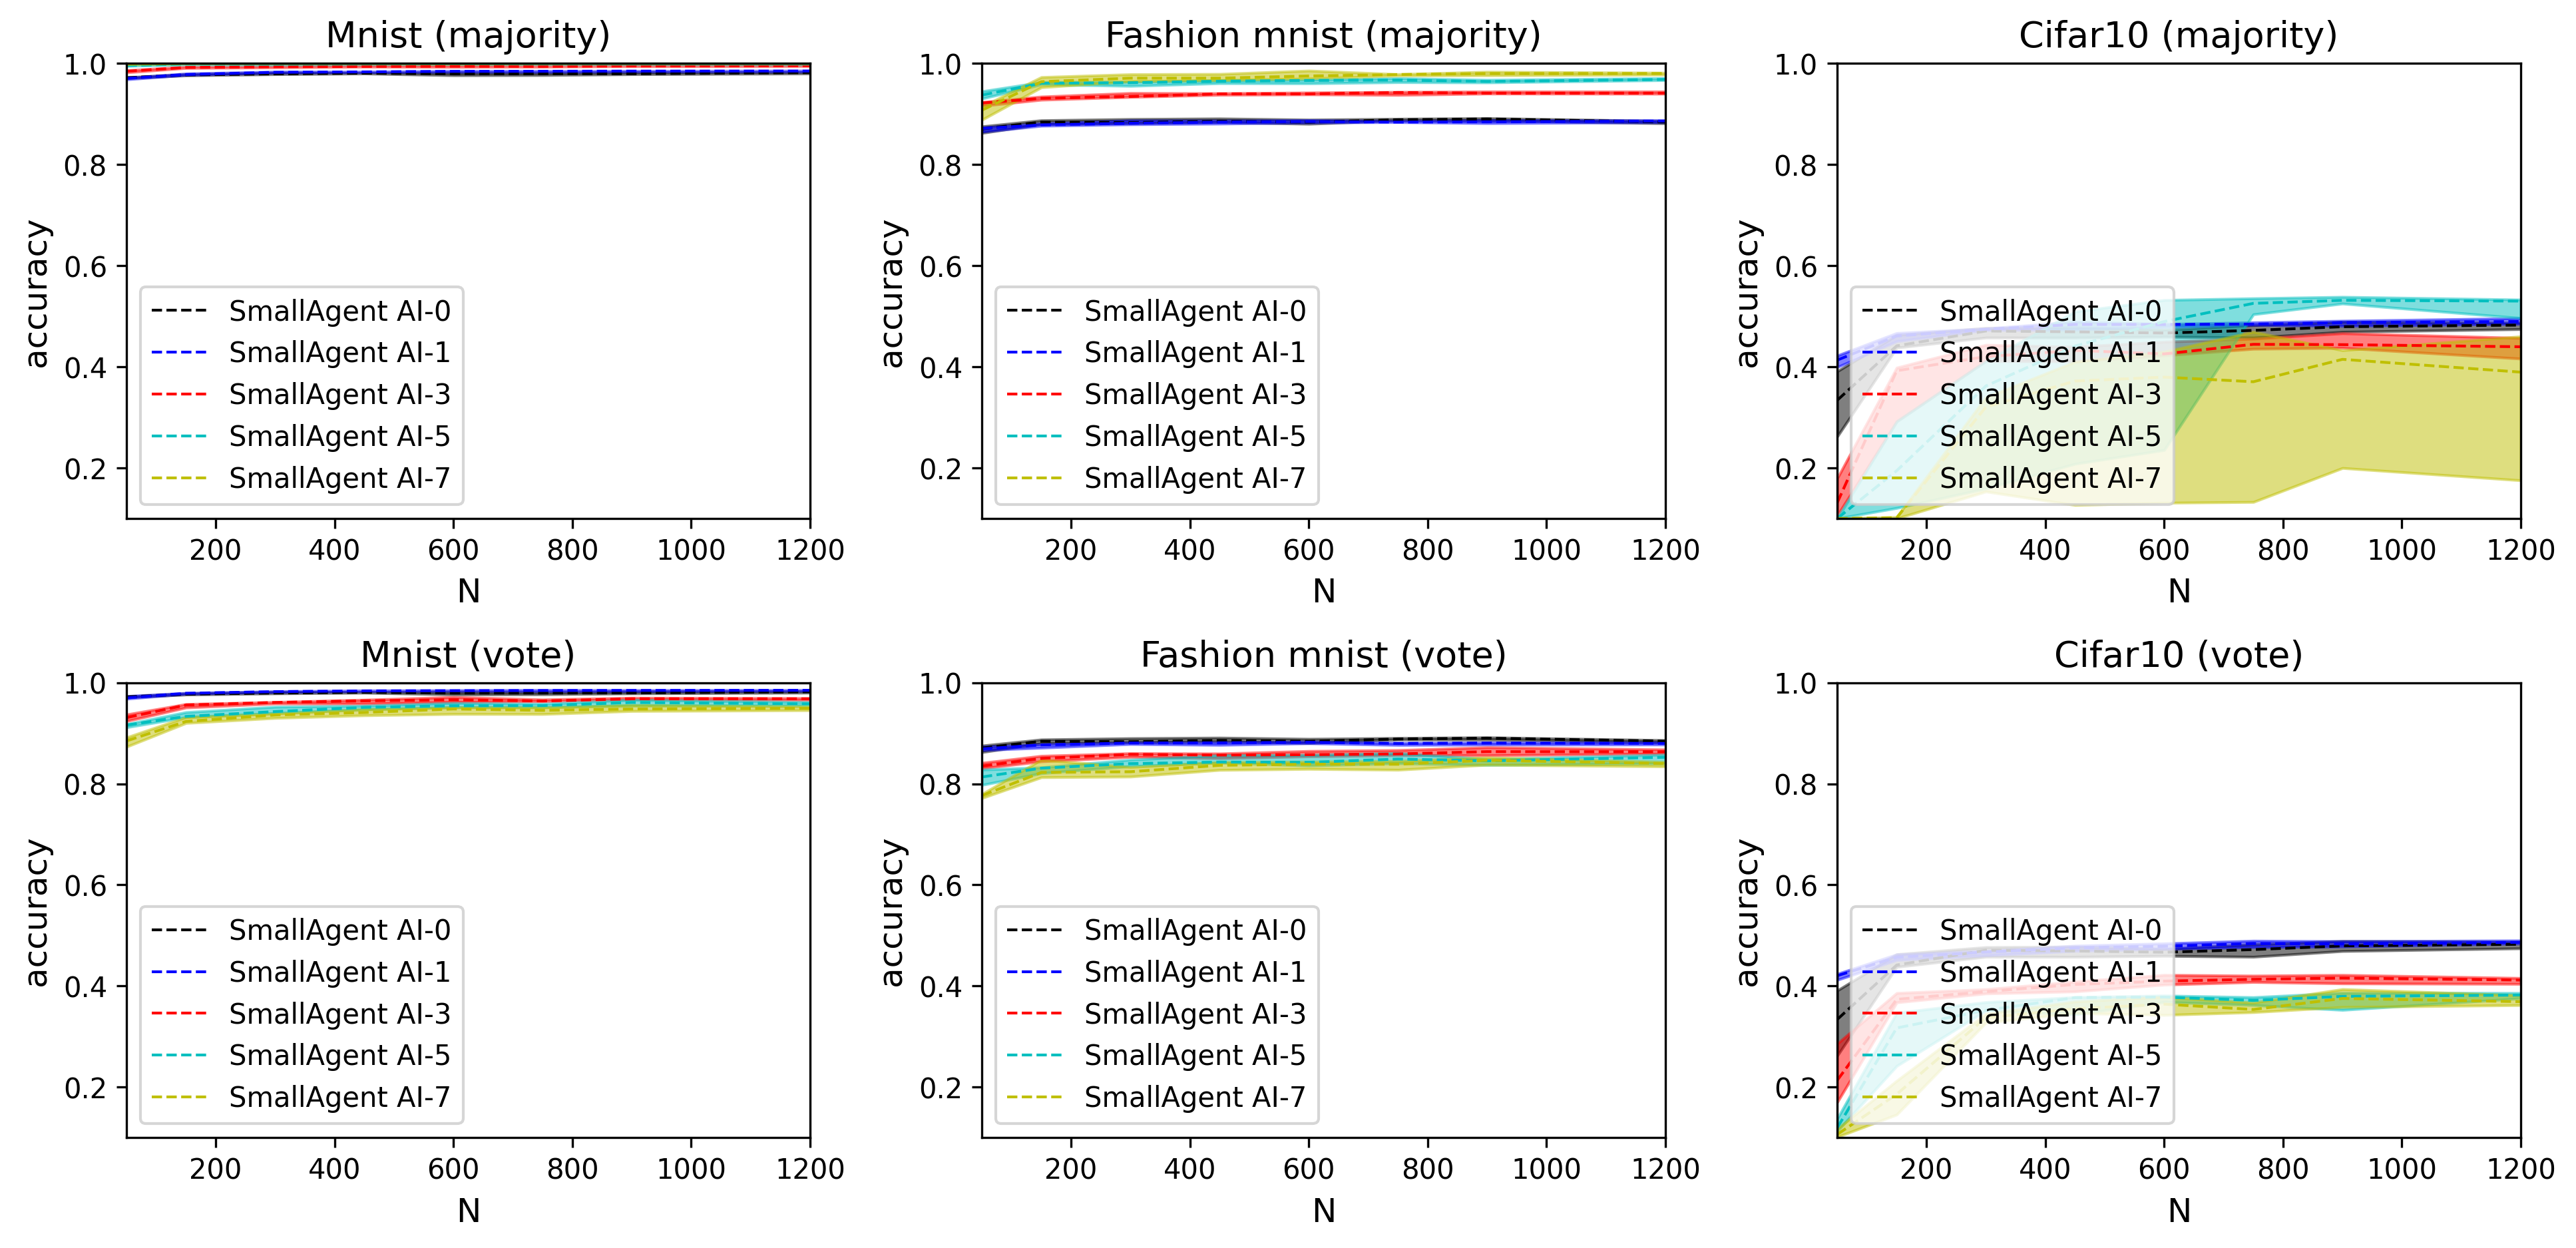

In [24]:
fig,axes=plot_results(df,x_min=50,
            x_max=1200,
            y_min=0.1,
            y_max=1,
            xlabel='N',
            ylabel='accuracy',
            show_fig=True,
            use_grid=False,
            markersize=2,
            percentile=False,
            save_fig=False,
            dpi=300,
            lw=1,
            alpha=0.5,
            loc='lower left',
            figsize=(13,9),
            grid_shape=(3,3),
            name_fig=f'multi_agents_sgdm',
            titles=["Mnist (majority)","Fashion mnist (majority)","Cifar10 (majority)","Mnist (vote)","Fashion mnist (vote)","Cifar10 (vote)"])

In [25]:
DATA=['MNIST','FASHION-MNIST','CIFAR-10']*2
temp = {DATA[k]:[] for k in range(3,6)}
for k in range(3,6):
    for inv in [0,1, 3, 5, 7]:
        key = f"SmallAgent AI-{inv}"
        if inv == 0:
            row_index = 150
        else:
            row_index = 900 if inv == 7 else 150 * inv
        value = df[k][key].loc[row_index, 'med']
        temp[DATA[k]].append(value)
df_gap=pd.DataFrame(temp)
df_gap['k']=[0,1, 3, 5, 7]
df_gap=df_gap.set_index('k')

In [26]:
df_gap

,MNIST,FASHION-MNIST,CIFAR-10
k,,,
0,0.977600,0.884200,0.441500
1,0.979100,0.876900,0.456700
3,0.964254,0.856757,0.403003
5,0.954910,0.849000,0.371500
7,0.948070,0.846479,0.375352


<Figure size 1200x400 with 0 Axes>

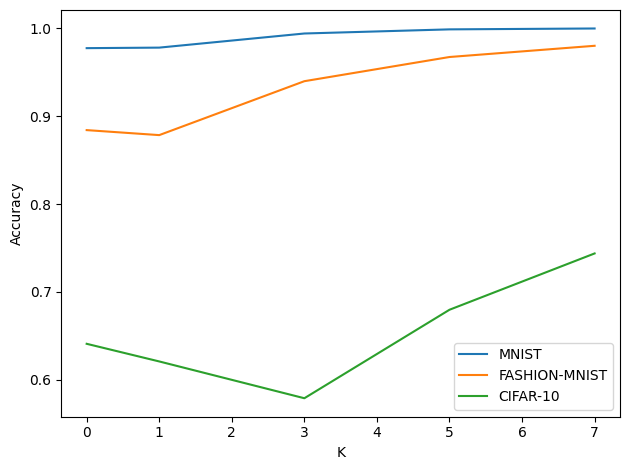

In [8]:
plt.figure(figsize=(12, 4))
df_gap.plot()
plt.xlabel("K")              
plt.ylabel("Accuracy")             
plt.grid(False)                   
plt.tight_layout()           
plt.show()

In [9]:
df_gap_latex=df_gap
df_gap_latex['Parms. agent']=[150,150,150,150,'~150']
df_gap_latex['Parms. globaux']=[150,150,450,750,'~1050']

In [10]:
df_gap_latex

,MNIST,FASHION-MNIST,CIFAR-10,Parms. agent,Parms. globaux
k,,,,,
0,0.977600,0.884200,0.640700,150,150
1,0.978200,0.878500,0.620600,150,150
3,0.994293,0.939940,0.578679,150,450
5,0.998998,0.967500,0.679500,150,750
7,1.000000,0.980282,0.743662,~150,~1050


In [11]:
latex_table = df_gap_latex.to_latex(
    index=True,              # pas d’index
    escape=False,             # autoriser le code LaTeX (comme $x10^{-3}$)
    column_format='|l|c|',    # format des colonnes
    longtable=False           # normal table (pas longtable)
)

In [12]:
print(latex_table)

\begin{tabular}{|l|c|}
\toprule
 & MNIST & FASHION-MNIST & CIFAR-10 & Parms. agent & Parms. globaux \\
k &  &  &  &  &  \\
\midrule
0 & 0.977600 & 0.884200 & 0.640700 & 150 & 150 \\
1 & 0.978200 & 0.878500 & 0.620600 & 150 & 150 \\
3 & 0.994293 & 0.939940 & 0.578679 & 150 & 450 \\
5 & 0.998998 & 0.967500 & 0.679500 & 150 & 750 \\
7 & 1.000000 & 0.980282 & 0.743662 & ~150 & ~1050 \\
\bottomrule
\end{tabular}

